In [4]:
import pandas as pd
%matplotlib inline

### datetime
1. datetime的单个对象为Timestamp对象
2. datetime的列表为DatetimeIndex对象

In [2]:
pd.to_datetime('2020-01-10')

Timestamp('2020-01-10 00:00:00')

In [3]:
pd.to_datetime(['2020-01-10','2020-01-11'])

DatetimeIndex(['2020-01-10', '2020-01-11'], dtype='datetime64[ns]', freq=None)

### 实例-按季度月周统计最高气温

In [10]:
fpath = "../datas/beijing_tianqi/beijing_tianqi_2018.csv"
df = pd.read_csv(fpath)
# 替换掉温度的后缀℃
df.loc[:, "bWendu"] = df["bWendu"].str.replace("℃", "").astype('int32')
df.loc[:, "yWendu"] = df["yWendu"].str.replace("℃", "").astype('int32')
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
0,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
1,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
3,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
4,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [18]:
df.set_index(pd.to_datetime(df['ymd']), inplace=True)

In [19]:
df.head()

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1


In [22]:
df['ymd'] = pd.to_datetime(df['ymd'])

In [24]:
df['ymd']

ymd
2018-01-01   2018-01-01
2018-01-02   2018-01-02
2018-01-03   2018-01-03
2018-01-04   2018-01-04
2018-01-05   2018-01-05
                ...    
2018-12-27   2018-12-27
2018-12-28   2018-12-28
2018-12-29   2018-12-29
2018-12-30   2018-12-30
2018-12-31   2018-12-31
Name: ymd, Length: 365, dtype: datetime64[ns]

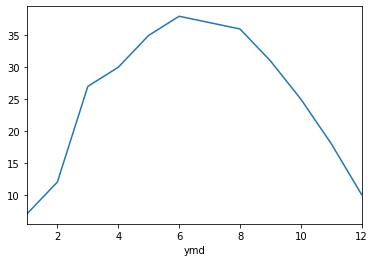

In [30]:
# 无法使用
# df.groupby(df['ymd'].month)['bWendu'].max()
mw = df.groupby(df.index.month)['bWendu'].max()
mw.plot()

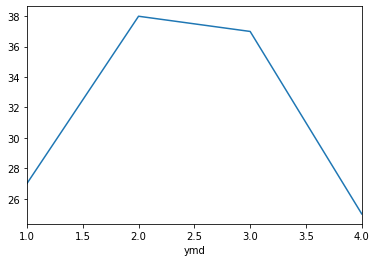

In [31]:
qw = df.groupby(df.index.quarter)['bWendu'].max()
qw.plot()

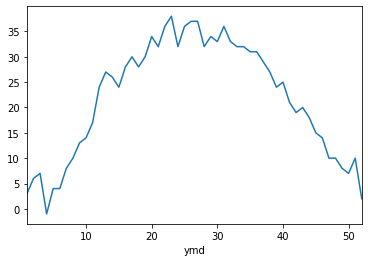

In [32]:
ww = df.groupby(df.index.week)['bWendu'].max()
ww.plot()

In [33]:
# 选取月份
df.loc['2018-01']

,ymd,bWendu,yWendu,tianqi,fengxiang,fengli,aqi,aqiInfo,aqiLevel
ymd,,,,,,,,,
2018-01-01,2018-01-01,3,-6,晴~多云,东北风,1-2级,59,良,2
2018-01-02,2018-01-02,2,-5,阴~多云,东北风,1-2级,49,优,1
2018-01-03,2018-01-03,2,-5,多云,北风,1-2级,28,优,1
2018-01-04,2018-01-04,0,-8,阴,东北风,1-2级,28,优,1
2018-01-05,2018-01-05,3,-6,多云~晴,西北风,1-2级,50,优,1
2018-01-06,2018-01-06,2,-5,多云~阴,西南风,1-2级,32,优,1
2018-01-07,2018-01-07,2,-4,阴~多云,西南风,1-2级,59,良,2
2018-01-08,2018-01-08,2,-6,晴,西北风,4-5级,50,优,1
2018-01-09,2018-01-09,1,-8,晴,西北风,3-4级,34,优,1


#### 时间缺失的补齐
1. 使用reindex + fillna
2. 使用resample + fillna

In [40]:
data = pd.DataFrame({
    "pdate": ["2019-12-01", "2019-12-02", "2019-12-04", "2019-12-07"],
    "pv": [100, 200, 400, 700],
    "uv": [10, 20, 40, 70],
})
data.head()

,pdate,pv,uv
0,2019-12-01,100,10
1,2019-12-02,200,20
2,2019-12-04,400,40
3,2019-12-07,700,70


In [41]:
data.set_index(pd.to_datetime(data['pdate']), inplace=True)
data

,pdate,pv,uv
pdate,,,
2019-12-01,2019-12-01,100,10
2019-12-02,2019-12-02,200,20
2019-12-04,2019-12-04,400,40
2019-12-07,2019-12-07,700,70


In [42]:
data.drop('pdate', axis=1, inplace=True)
data

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-07,700,70


In [44]:
dindex = pd.date_range(start='2019-12-01', end='2019-12-08')
dindex

DatetimeIndex(['2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04',
               '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08'],
              dtype='datetime64[ns]', freq='D')

In [45]:
# reindex
data.reindex(dindex, fill_value=0)

,pv,uv
2019-12-01,100,10
2019-12-02,200,20
2019-12-03,0,0
2019-12-04,400,40
2019-12-05,0,0
2019-12-06,0,0
2019-12-07,700,70
2019-12-08,0,0


In [46]:
data

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-04,400,40
2019-12-07,700,70


In [57]:
data.resample('D').sum().fillna(1)

,pv,uv
pdate,,
2019-12-01,100,10
2019-12-02,200,20
2019-12-03,0,0
2019-12-04,400,40
2019-12-05,0,0
2019-12-06,0,0
2019-12-07,700,70


In [54]:
data.resample('2D').mean().fillna(1)

,pv,uv
pdate,,
2019-12-01,150.0,15.0
2019-12-03,400.0,40.0
2019-12-05,1.0,1.0
2019-12-07,700.0,70.0


In [61]:
data.resample('D').mean().fillna(1)

,pv,uv
pdate,,
2019-12-01,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,1.0,1.0
2019-12-04,400.0,40.0
2019-12-05,1.0,1.0
2019-12-06,1.0,1.0
2019-12-07,700.0,70.0


In [60]:
data.resample('B').mean().fillna(1)

,pv,uv
pdate,,
2019-11-29,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,1.0,1.0
2019-12-04,400.0,40.0
2019-12-05,1.0,1.0
2019-12-06,700.0,70.0


In [62]:
data.resample('C').mean().fillna(1)

,pv,uv
pdate,,
2019-11-29,100.0,10.0
2019-12-02,200.0,20.0
2019-12-03,1.0,1.0
2019-12-04,400.0,40.0
2019-12-05,1.0,1.0
2019-12-06,700.0,70.0


+ 采样频率参考
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases
+ 使用sum聚合方法fillna貌似不生效，使用mean聚合方法的时候会生效